# Supervised Learning - Project

In this Project, we are going to perform a full supervised learning machine learning project on a "Diabetes" dataset. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. 

[Kaggle Dataset](https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset)

# Part I : EDA - Exploratory Data Analysis

For this task, you are required to conduct an exploratory data analysis on the diabetes dataset. You have the freedom to choose the visualizations you want to use, but your analysis should cover the following tasks mostly:

- Are there any missing values in the dataset?
- How are the predictor variables related to the outcome variable?
- What is the correlation between the predictor variables?
- What is the distribution of each predictor variable?
- Are there any outliers in the predictor variables?
- How are the predictor variables related to each other?
- Is there any interaction effect between the predictor variables?
- What is the average age of the individuals in the dataset?
- What is the average glucose level for individuals with diabetes and without diabetes?
- What is the average BMI for individuals with diabetes and without diabetes?
- How does the distribution of the predictor variables differ for individuals with diabetes and without diabetes?
- Are there any differences in the predictor variables between males and females (if gender information is available)?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Figure size 800x600 with 0 Axes>

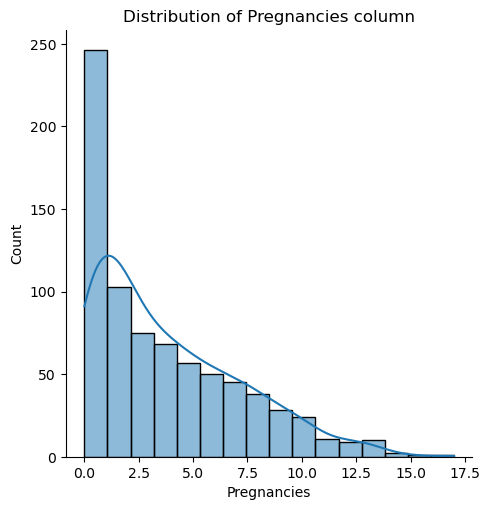

<Figure size 800x600 with 0 Axes>

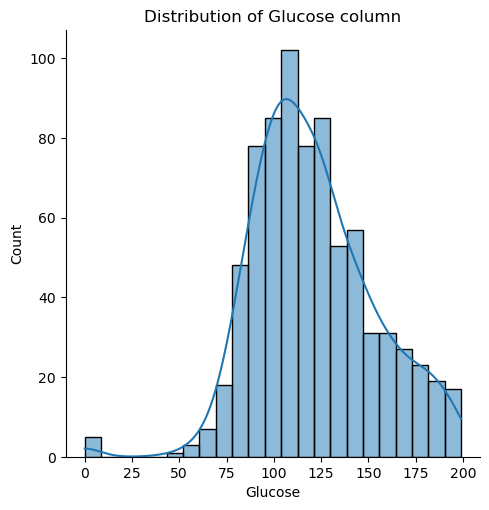

<Figure size 800x600 with 0 Axes>

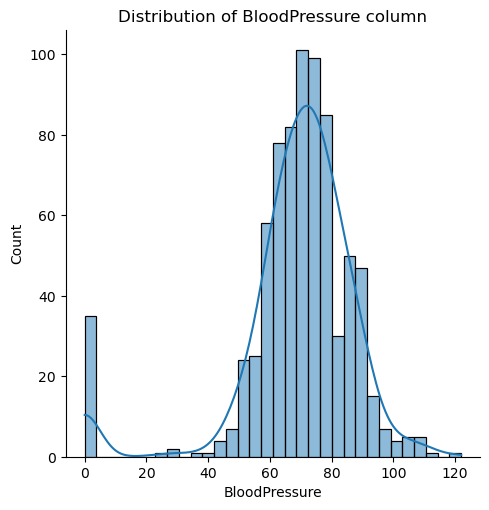

<Figure size 800x600 with 0 Axes>

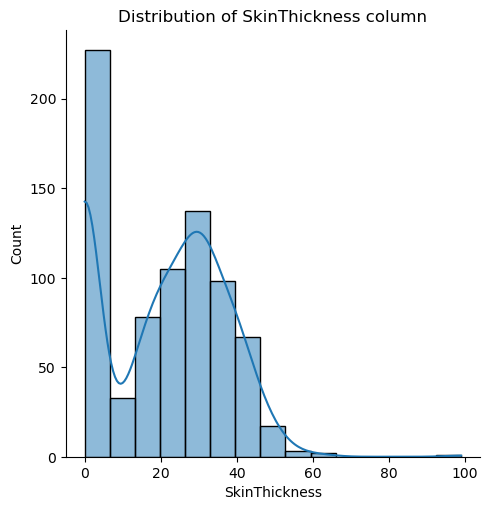

<Figure size 800x600 with 0 Axes>

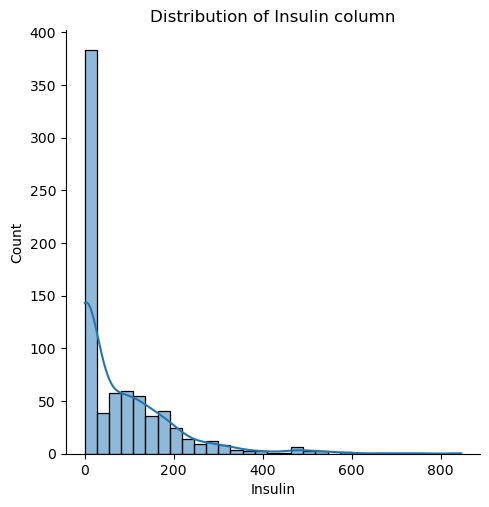

<Figure size 800x600 with 0 Axes>

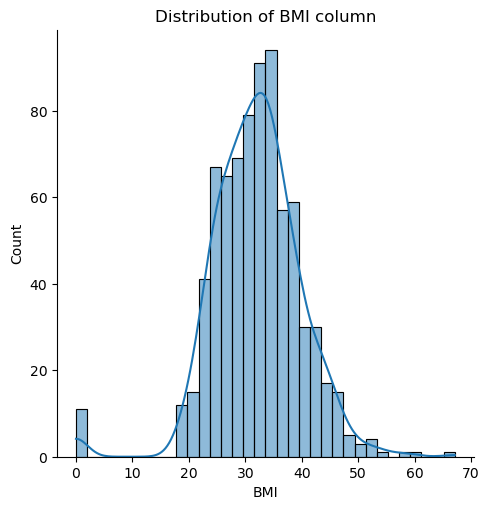

<Figure size 800x600 with 0 Axes>

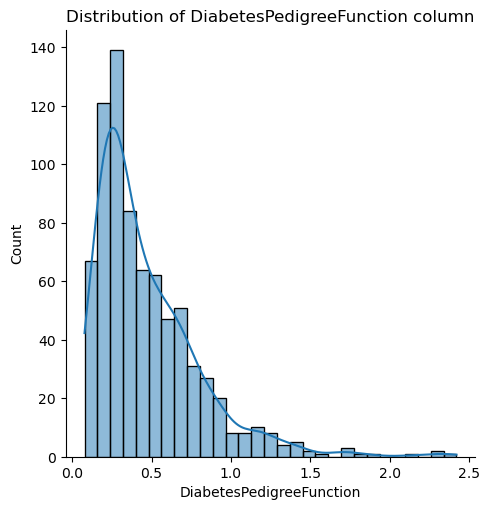

<Figure size 800x600 with 0 Axes>

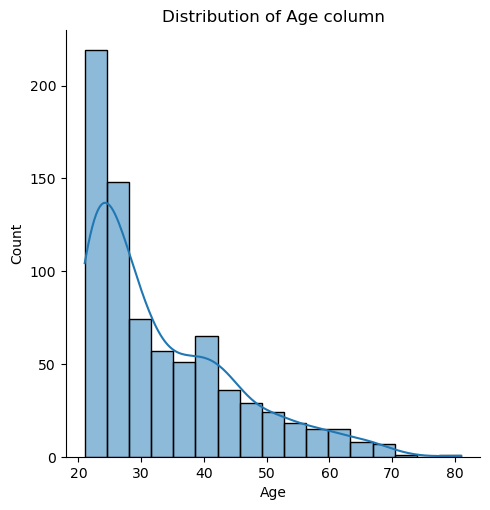

<Figure size 800x600 with 0 Axes>

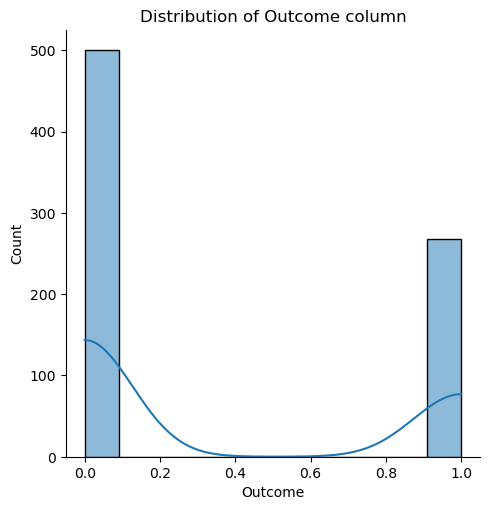

In [5]:
for col in df:
    plt.figure(figsize=(8,6))
    sns.displot(df[col], kde = True)
    plt.title(f"Distribution of {col} column")
    plt.show()

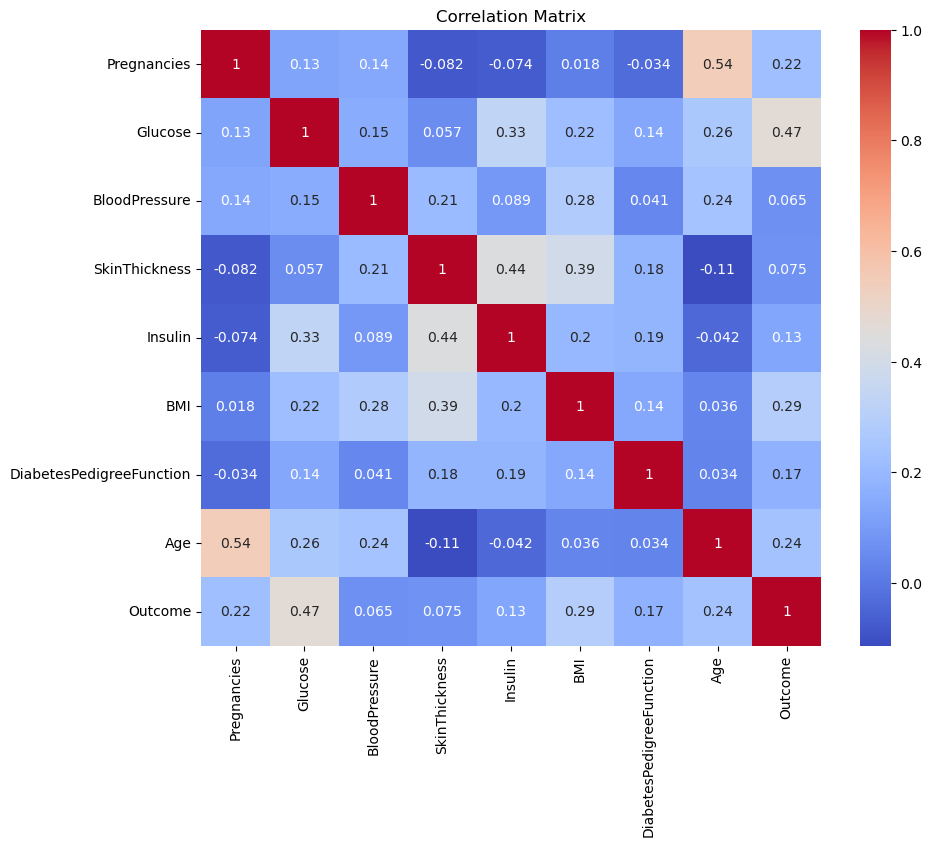

In [6]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Part II : Preprocessing & Feature Engineering

You need to perform preprocessing on the given dataset. Please consider the following tasks and carry out the necessary steps accordingly.
- Handling missing values
- Handling outliers
- Scaling and normalization
- Feature Engineering
- Handling imbalanced data

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    median = df[col].median()
    df.loc[df[col]==0,col] = median

In [9]:
df["GLUCOSE/INSULIN"] = df["Glucose"]/df["Insulin"]

In [10]:
X = df.drop('Outcome', axis=1)
y = df['Outcome'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 465 to 688
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               537 non-null    int64  
 1   Glucose                   537 non-null    int64  
 2   BloodPressure             537 non-null    int64  
 3   SkinThickness             537 non-null    int64  
 4   Insulin                   537 non-null    float64
 5   BMI                       537 non-null    float64
 6   DiabetesPedigreeFunction  537 non-null    float64
 7   Age                       537 non-null    int64  
 8   GLUCOSE/INSULIN           537 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 42.0 KB


In [11]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

In [12]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8
0,-1.146022,0.057948,-1.343999,-1.571820,0.093772,-1.520800,-0.034886,-1.030638,-0.767831
1,-1.146022,2.185674,0.768929,-1.461412,0.865062,-0.090384,0.661766,-0.946858,-0.863115
2,2.174012,0.689617,1.744126,0.636335,0.489058,0.554706,-0.634613,1.482771,-0.884379
3,1.268549,0.955582,0.443863,0.525927,1.106089,1.438198,0.158965,0.226066,-1.034998
4,-0.542379,-1.005915,-1.669064,-0.467742,-0.624491,-0.356834,-0.976882,-0.946858,0.293796
...,...,...,...,...,...,...,...,...,...
532,-0.240558,1.587251,-0.693867,1.077966,1.250706,0.260209,-0.325663,-0.276615,-1.013882
533,0.363085,-0.473984,-0.043736,1.740413,-0.195462,0.484588,-0.607353,-0.025275,-0.617997
534,-1.146022,-0.906178,1.012728,-0.246927,-0.571465,0.666895,-0.655816,-0.779297,0.075446
535,-0.240558,1.188302,-0.206268,0.305112,2.243741,0.400445,-0.362010,0.142286,-1.172277


In [13]:
X_train_transformed_imbalanced = X_train_transformed
y_train_imbalanced = y_train

In [14]:
from sklearn.utils import resample

In [15]:
train_data = pd.concat([X_train, y_train], axis=1)

In [16]:
majority_class = train_data[train_data['Outcome'] == 0]
minority_class = train_data[train_data['Outcome'] == 1]

In [17]:
# Upsample the minority class
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combine the upsampled minority class with the majority class
upsampled_data = pd.concat([majority_class, minority_upsampled])

# Separate the features and target variable
X_train_resampled = upsampled_data.drop('Outcome', axis=1)
y_train_resampled = upsampled_data['Outcome']

# Part III : Training ML Model

For this task, you are required to build a machine learning model to predict the outcome variable. This will be a binary classification task, as the target variable is binary. You should select at least two models, one of which should be an ensemble model, and compare their performance.

- Train the models: Train the selected models on the training set.
- Model evaluation: Evaluate the trained models on the testing set using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC.
- Model comparison: Compare the performance of the selected models and choose the best-performing model based on the evaluation metrics. You can also perform additional analysis, such as model tuning and cross-validation, to improve the model's performance.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [19]:
X_test_transformed =scaler.transform(X_test)

In [20]:
clf = LogisticRegression(penalty=None) # logistic regression with no penalty term in the cost function.
clf.fit(X_train_transformed_imbalanced, y_train_imbalanced)
y_pred_imbalanced = clf.predict(X_test_transformed)

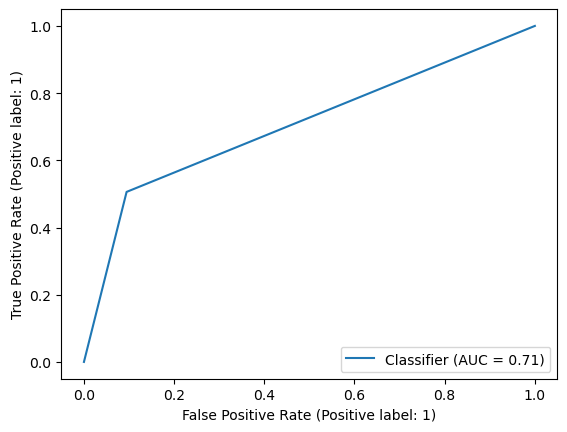

In [21]:
RocCurveDisplay.from_predictions(y_test,y_pred_imbalanced)

In [22]:
accuracy = accuracy_score(y_test, y_pred_imbalanced)
precision = precision_score(y_test, y_pred_imbalanced)
recall = recall_score(y_test, y_pred_imbalanced)
f1 = f1_score(y_test, y_pred_imbalanced)
roc_auc = roc_auc_score(y_test, y_pred_imbalanced)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7619047619047619
Precision: 0.75
Recall: 0.5060240963855421
F1-score: 0.6043165467625898
ROC-AUC: 0.7057147508954738


In [23]:
clf = LogisticRegression(penalty=None) # logistic regression with no penalty term in the cost function.
clf.fit(X_train_resampled, y_train_resampled)
y_pred_resampled = clf.predict(X_test_transformed)

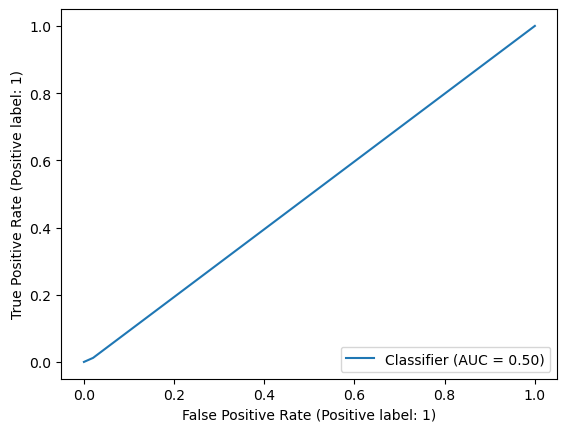

In [24]:
RocCurveDisplay.from_predictions(y_test,y_pred_resampled)

In [25]:
accuracy = accuracy_score(y_test, y_pred_resampled)
precision = precision_score(y_test, y_pred_resampled)
recall = recall_score(y_test, y_pred_resampled)
f1 = f1_score(y_test, y_pred_resampled)
roc_auc = roc_auc_score(y_test, y_pred_resampled)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.6320346320346321
Precision: 0.25
Recall: 0.012048192771084338
F1-score: 0.02298850574712644
ROC-AUC: 0.495888961250407


In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [27]:
# Assuming you have your features in X_train and labels in y_train
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf_classifier.fit(X_train_transformed_imbalanced, y_train_imbalanced)

# Predict on test data
y_pred = rf_classifier.predict(X_test_transformed)


In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[126  22]
 [ 32  51]]


In [29]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7662337662337663
Precision: 0.6986301369863014
Recall: 0.6144578313253012
F1-score: 0.6538461538461539
ROC-AUC: 0.7329045913383263


In [30]:
# Assuming you have your features in X_train and labels in y_train
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the random forest classifier
rf_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = rf_classifier.predict(X_test_transformed)


In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[148   0]
 [ 83   0]]


In [32]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.6406926406926406
Precision: 0.0
Recall: 0.0
F1-score: 0.0
ROC-AUC: 0.5


In [33]:
rf_classifier = RandomForestClassifier(class_weight='balanced')
rf_classifier.fit(X_train_transformed_imbalanced, y_train_imbalanced)
y_pred = rf_classifier.predict(X_test_transformed)


In [34]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[128  20]
 [ 35  48]]


In [35]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC-AUC:", roc_auc)

Accuracy: 0.7619047619047619
Precision: 0.7058823529411765
Recall: 0.5783132530120482
F1-score: 0.6357615894039735
ROC-AUC: 0.7215890589384566


# Part IV : Conclusion

From the machine learning models developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [36]:
# From the EDA when can clearly see that the observations on weather that individual had diabetes is unbalanced
# to account for this we performed oversampling of the minority class which is positive for diabetes 

# using logistic regression, resampling actaully made the accuracy and other metrics lower, this is because we 
# removed bias and decreased the overfitting for the result 0 for diabetes, but inturn lowered observed accuracy 
# because the overfiiting was actually making the model appear more accurate than it is. Its necessary to remove bias 
# even if it is increasing metrics and performance 

# Since RandomForestClassifier has some built-in methods to handle class imbalance, we can see that it outperforms
# logistic regression with an unbalanced class 

# However when we use a RandomForestClassifier and an oversampling of the minority class we see that it has the 
# opposite effect of the logistic regression, it adds bias and severly generalizes, specifically predicting all 
# outcomes to be negative (0)

# there is a number of possible reasons for this, for example it could be attributed to Insufficient Information
# in the Minority Class, or Data Leakage when oversampling, but further investigation is needed for it to be determined
